In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

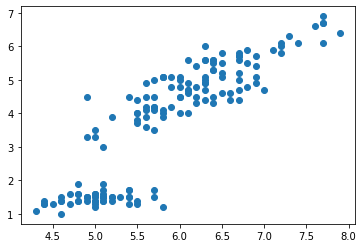

In [8]:
plt.scatter(df['SepalLengthCm'],df['PetalLengthCm'])

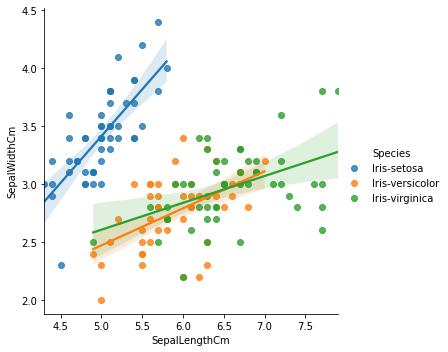

In [13]:
sns.lmplot('SepalLengthCm','SepalWidthCm',data=df,hue='Species')

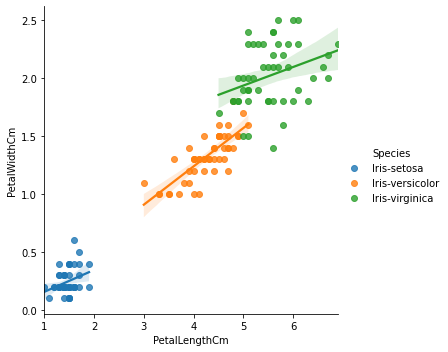

In [14]:
sns.lmplot('PetalLengthCm','PetalWidthCm',data=df,hue='Species')

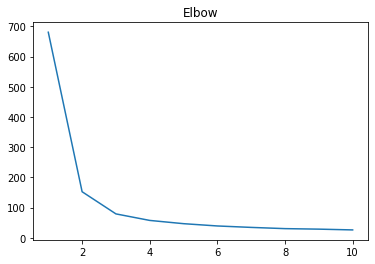

In [96]:
x = df.iloc[:,[1,2,3,4]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow')
plt.show()

#### Elbow is 3, so number of clusters will be 3

In [35]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)

In [76]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Petal')

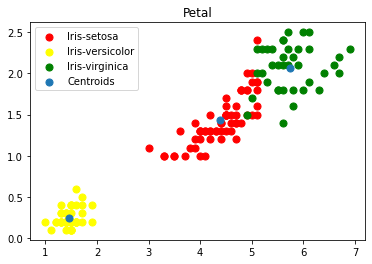

In [92]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 2], x[y_kmeans == 1 , 3],
           s = 50 , c = 'yellow' , label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2 ,2], x[y_kmeans == 2 ,3],
           s = 50,c= 'green' , label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s = 50
            , label = 'Centroids') 
plt.legend()
plt.title('Petal')

Text(0.5, 1.0, 'Sepal')

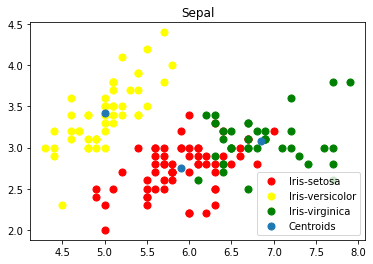

In [93]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0], x[y_kmeans == 1 , 1],
           s = 50 , c = 'yellow' , label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2 ,0], x[y_kmeans == 2 ,1],
           s = 50,c= 'green' , label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 50
            , label = 'Centroids') 
plt.legend()
plt.title('Sepal')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species_numeric'] = le.fit_transform(df['Species'])

In [87]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Species_numeric'],kmeans.labels_))
print(classification_report(df['Species_numeric'],kmeans.labels_))

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150

